In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.animation as animation
from tqdm import tqdm
from IPython.display import HTML

In [2]:
Nt, Nx, Ny = 11, 6, 6
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
t = np.linspace(0, 1, Nt)
deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]
k = 0.075
lambda_ = (k * deltat) / deltax**2
mu_ = (k * deltat) / deltay**2

In [3]:
def ui(x, y):
    return np.sin(np.pi * (x + y))

def H1(y, t):
    return np.exp(-2 * np.pi**2 * t) * np.sin(np.pi * y)

def H2(x, t):
    return np.exp(-2 * np.pi**2 * t) * np.sin(np.pi * x)

def H3(y, t):
    return np.exp(-2 * np.pi**2 * t) * np.sin(np.pi * (y + 1))

def H4(x, t):
    return np.exp(-2 * np.pi**2 * t) * np.sin(np.pi * (x + 1))

In [4]:
def init_u(Nx, Ny, x, y):
    u = np.zeros((Nt, Nx, Ny))
    u[0, :, :] = ui(np.outer(x, np.ones(Ny)), np.outer(np.ones(Nx), y))
    u[:, 0, :] = H1(y, 0)
    u[:, -1, :] = H2(x, 0)
    u[:, :, 0] = H3(y, 0)
    u[:, :, -1] = H4(x, 0)
    return u

In [5]:
def get_solution(u, lambda_, mu_, t, x, y):
    for l in range(1, len(t)):
        u[l, 0, :] = H1(y, t[l])
        u[l, -1, :] = H2(x, t[l])
        u[l, :, 0] = H3(y, t[l])
        u[l, :, -1] = H4(x, t[l])
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                u[l, i, j] = (1 - 2 * lambda_ - 2 * mu_) * u[l - 1, i, j] + \
                             lambda_ * (u[l - 1, i + 1, j] + u[l - 1, i - 1, j]) + \
                             mu_ * (u[l - 1, i, j + 1] + u[l - 1, i, j - 1])
    return u


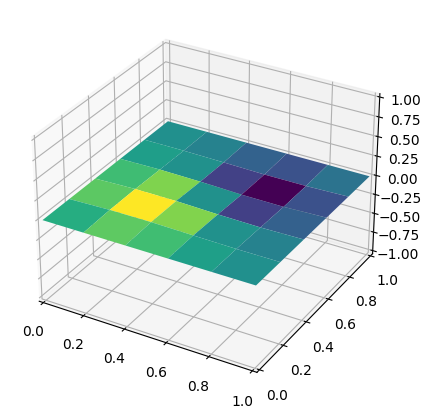

In [6]:
u = init_u(Nx, Ny, x, y)
u = get_solution(u, lambda_, mu_, t, x, y)
def init_animation():
    ax.set_xlim3d(0, 1)
    ax.set_ylim3d(0, 1)
    ax.set_zlim3d(-1, 1)
    return ax,

def update_animation(i, u, X, Y, ax):
    ax.clear()
    init_animation()
    surface = ax.plot_surface(X, Y, u[i, :, :], cmap='viridis')
    return surface,

fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
Animation =animation.FuncAnimation(fig, update_animation, frames=len(t), init_func=init_animation, fargs=(u, X, Y, ax))
HTML(Animation.to_html5_video())